## Heart Attack Prediction Project 
This project will help predict if a patient has a higher chance of a heart attack based on information provided in the dataset provided

In [5]:
#importing all tools that I may need to be able to train and test my dataset 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [6]:
df = pd.read_csv("heart.csv")


The following table shows a portion of the heart attack dataset that we are using for our project.

In [7]:
df.head(40)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## 1. Problem Definition 
Predicting a heart attack

By looking at ten different aspects of a persons health can we determine whether or not a patient has a higher chance of a heart attack

## 2. Data
The dataset is from Kaggle where it takes ten different aspects of a persons health and tries to predict whether or not they have a higher chance of having a heart attack. You can find this information by clicking the link https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. 

## 3.Evaluation

If I can achieve 85% accuracy in predicting whether a patient has a higher chance of having a heart attack or not then we should use this tool to evaluate future patients. 

## 4. Features

1. Age : Age of the patient

2. Sex : Sex of the patient (1 = male; 0 = female)

3. exang: exercise induced angina (1 = yes; 0 = no)

4. ca: number of major vessels (0-3)

5. cp : Chest Pain type (4 types; number indicates which one was present): 
         1: typical angina
         2: atypical angina
         3: non-anginal pain
         4: asymptomatic
         
6. trtbps : resting blood pressure (in mm Hg)

7. chol : cholestoral in mg/dl fetched via BMI sensor

8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

9. rest_ecg : resting electrocardiographic results (number indicates which one is present)
        0: normal
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        
10. thalach : maximum heart rate achieved

11. target : 0= less chance of heart attack 1= more chance of heart attack (which allows us to train our models and predict) 

## Data Observation

In [8]:
# output in the dataset = target which indicates whether a patient has a higher chance of a heart attack
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

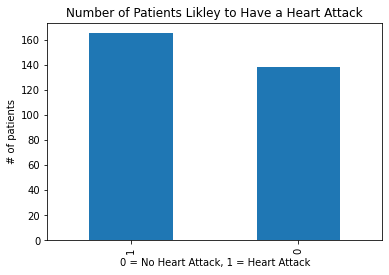

In [9]:
df["output"].value_counts().plot(kind="bar")
plt.title("Number of Patients Likley to Have a Heart Attack")
plt.xlabel("0 = No Heart Attack, 1 = Heart Attack")
plt.ylabel("# of patients");

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding patterns within the dataset

In [11]:
#comparing sex with target to see if there is a link or pattern
pd.crosstab(df.output, df.sex)

sex,0,1
output,,
0,24,114
1,72,93


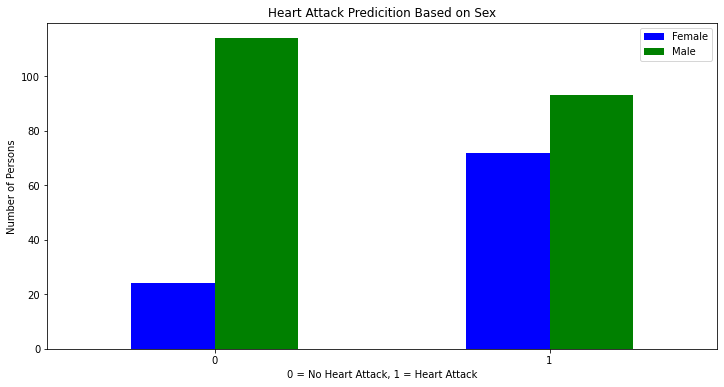

In [12]:
pd.crosstab(df.output, df.sex).plot(kind="bar", figsize=(12, 6), color=["blue", "green"])

plt.title("Heart Attack Predicition Based on Sex")
plt.xlabel("0 = No Heart Attack, 1 = Heart Attack")
plt.ylabel("Number of Persons")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

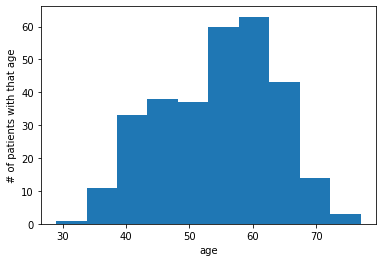

In [13]:
df.age.plot.hist()
plt.xlabel("age")
plt.ylabel("# of patients with that age");
#showing the distribution of age of the patients within the data 

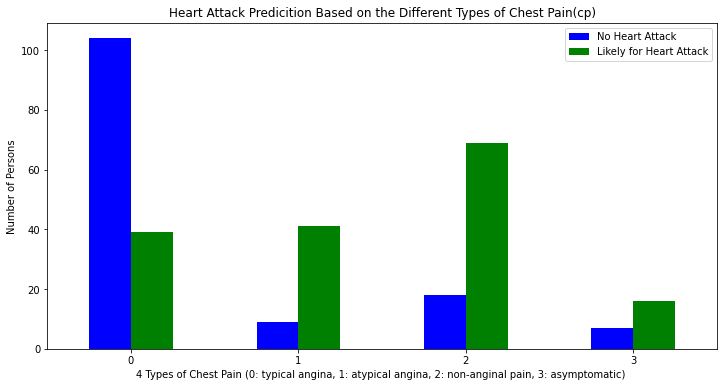

In [14]:
#comparing those with different types of chest pain and seeing if one has a higher frequency 
pd.crosstab(df.cp, df.output).plot(kind="bar", figsize=(12, 6), color=["blue", "green"])

plt.title("Heart Attack Predicition Based on the Different Types of Chest Pain(cp)")
plt.xlabel("4 Types of Chest Pain (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) ")
plt.ylabel("Number of Persons")
plt.legend(["No Heart Attack", "Likely for Heart Attack"])
plt.xticks(rotation = 0);

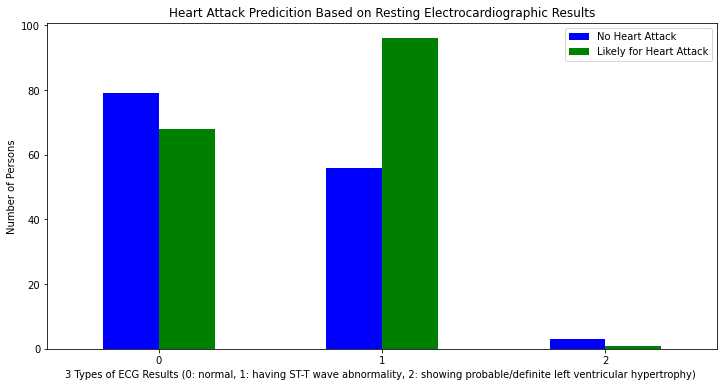

In [15]:
#comparing resting electrocardiographic results with output values 
pd.crosstab(df.restecg, df.output).plot(kind="bar", figsize=(12, 6), color=["blue", "green"])

plt.title("Heart Attack Predicition Based on Resting Electrocardiographic Results")
plt.xlabel("3 Types of ECG Results (0: normal, 1: having ST-T wave abnormality, 2: showing probable/definite left ventricular hypertrophy) ")
plt.ylabel("Number of Persons")
plt.legend(["No Heart Attack", "Likely for Heart Attack"])
plt.xticks(rotation = 0);

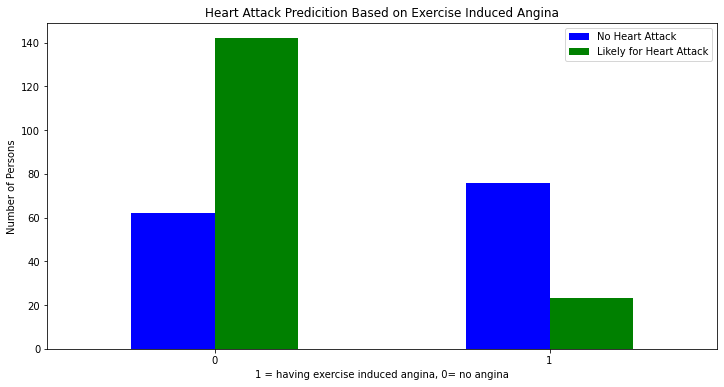

In [16]:
#comparing exercise induced angina
pd.crosstab(df.exng, df.output).plot(kind="bar", figsize=(12, 6), color=["blue", "green"])

plt.title("Heart Attack Predicition Based on Exercise Induced Angina")
plt.xlabel("1 = having exercise induced angina, 0= no angina")
plt.ylabel("Number of Persons")
plt.legend(["No Heart Attack", "Likely for Heart Attack"])
plt.xticks(rotation = 0);

In [17]:
pd.crosstab(df.output, df.exng)

exng,0,1
output,,
0,62,76
1,142,23


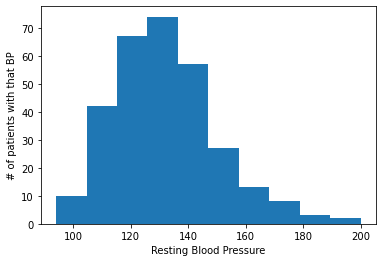

In [18]:
df.trtbps.plot.hist()
plt.xlabel("Resting Blood Pressure")
plt.ylabel("# of patients with that BP");

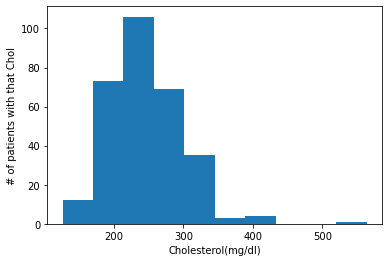

In [19]:
df.chol.plot.hist()
plt.xlabel("Cholesterol(mg/dl)")
plt.ylabel("# of patients with that Chol");

In [20]:
#Making a correlation matrix 
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 5. Modeling

In [21]:
# Split data into x and y in order to train and test the data for machine modeling 
#get rid of output in the x split in order to test it against the actual output 
x = df.drop("output", axis = 1)
y = df["output"]

In [22]:
np.random.seed(39)

#now to actually split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [23]:
len(x_train)

257

In [24]:
#models I will be trying in order to achieve my 85% accuracy rate
models = { "LR": LogisticRegression(), "KNN":KNeighborsClassifier(), "RF": RandomForestClassifier()}

In [25]:
def score_acc(models, x_train, x_test, y_train, y_test): 
    np.random.seed(39)
    mod_accur ={}
    #loop through all models 
    for modType, model in models.items(): 
        model.fit(x_train, y_train)
        mod_accur[modType] = model.score(x_test, y_test)
    return mod_accur

In [26]:
#this will show us the % of accuracy of the three different models 
mod_accur = score_acc(models, x_train, x_test, y_train, y_test)
mod_accur

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8478260869565217, 'KNN': 0.5652173913043478, 'RF': 0.8043478260869565}

In [27]:
#based on this first preliminary test I am going to remove KNN (close to 25-30% difference) and see how I can improve LR and RF
#tune LR and RF
LR_grid = {"C":np.logspace(-4, 4, 20), "solver": ["liblinear"]}

In [28]:
#tune RF
RF_grid = {"n_estimators":np.arange(10, 1000, 10), "max_depth":[None, 3, 5, 10], 
           "min_samples_split":np.arange(2, 20, 2), "min_samples_leaf":np.arange(1, 20, 2)}

In [29]:
np.random.seed(39)

rs_LR_grid = RandomizedSearchCV(LogisticRegression(), param_distributions = LR_grid, 
                               cv= 20, n_iter= 19, verbose = True)
rs_LR_grid.fit(x_train, y_train)

Fitting 20 folds for each of 19 candidates, totalling 380 fits


RandomizedSearchCV(cv=20, estimator=LogisticRegression(), n_iter=19,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_LR_grid.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [31]:
rs_LR_grid.score(x_train, y_train)

0.8560311284046692

In [32]:
#will come back to LR to keep tuning if RF does not get closer to LR

In [33]:
np.random.seed(39)

rf_ck_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions = RF_grid, 
                               cv= 15, n_iter= 19, verbose = True)
rf_ck_grid.fit(x_train, y_train)

Fitting 15 folds for each of 19 candidates, totalling 285 fits


RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(), n_iter=19,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True

In [34]:
rf_ck_grid.best_params_

{'n_estimators': 580,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [35]:
rf_ck_grid.score(x_test, y_test)

0.8260869565217391

In [36]:
#The RF is about 4% lower than LR so I will continue to fine tune LR to reach that goal of 90%

In [37]:
#added penalty to see if it could tune and get closer to 90% but stuck at 86.9
LR_grid = {"C":np.logspace(-4, 4, 20), "solver": ["liblinear", "saga"], "penalty": ['l1', 'l2']}

np.random.seed(39)

gs_LR_grid = GridSearchCV(LogisticRegression(), param_grid = LR_grid, 
                               cv= 10, verbose = True)
model = gs_LR_grid.fit(x_train, y_train)

#import Pickle
import pickle 
Model = pickle.dumps(model)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ajd34\OneDrive\desktop\project_1\env\li

In [38]:
gs_LR_grid.best_params_

{'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}

In [39]:
gs_LR_grid.score(x_test, y_test)

0.8695652173913043

In [40]:
y_preds = gs_LR_grid.predict(x_test)

In [41]:
print(y_preds)

[1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 1]


In [42]:
y_test

144    1
267    0
272    0
14     1
206    0
139    1
170    0
21     1
207    0
276    0
263    0
107    1
268    0
65     1
29     1
117    1
181    0
201    0
191    0
2      1
242    0
51     1
184    0
166    0
135    1
6      1
108    1
96     1
23     1
273    0
60     1
214    0
158    1
182    0
147    1
118    1
258    0
159    1
8      1
285    0
20     1
203    0
231    0
55     1
265    0
99     1
Name: output, dtype: int64

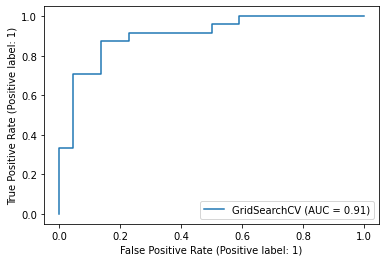

In [43]:
plot_roc_curve(gs_LR_grid, x_test, y_test)

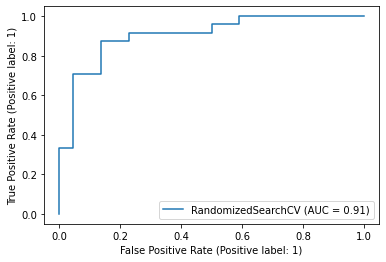

In [44]:
plot_roc_curve(rs_LR_grid, x_test, y_test)
#same curve from randomized grid to grid search

In [45]:
print(confusion_matrix(y_test, y_preds))

[[19  3]
 [ 3 21]]


In [46]:
print(classification_report(y_test, y_preds))
#precision - predicts is some is likely to have heart attack (= 1)
#recall - actual positives without any false negatives 
#f1 = both precision and recall

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.88      0.88      0.88        24

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



In [47]:
#which of the features were most important to predicting heart attacks?
gs_LR_grid.best_params_

{'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}

In [48]:
clf = LogisticRegression(C=0.08858667904100823, solver ="liblinear")

clf.fit(x_train, y_train);

In [49]:
clf.coef_

array([[ 0.00832869, -0.64844088,  0.58606917, -0.01881838, -0.00256132,
        -0.02209035,  0.1425402 ,  0.02929121, -0.33847624, -0.39274558,
         0.34842684, -0.54229447, -0.61621138]])

In [50]:
ft_dic = dict(zip(df.columns, list(clf.coef_[0])))
ft_dic

{'age': 0.008328692995620965,
 'sex': -0.6484408757643643,
 'cp': 0.5860691744146708,
 'trtbps': -0.01881838296497981,
 'chol': -0.0025613194297289727,
 'fbs': -0.022090353368365737,
 'restecg': 0.1425402039285249,
 'thalachh': 0.02929121431689275,
 'exng': -0.3384762434946811,
 'oldpeak': -0.3927455793815094,
 'slp': 0.3484268410044613,
 'caa': -0.5422944737434363,
 'thall': -0.6162113838261126}

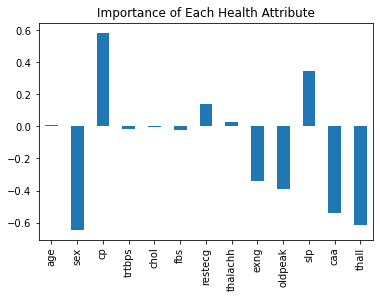

In [51]:
#in order to visualize this we will change this list above to make it more readable
feat_df = pd.DataFrame(ft_dic, index=[0])
feat_df.T.plot.bar(title="Importance of Each Health Attribute", legend=False);
#postive results cosely relate to the attributes that tie into heart disease. Whereas negatives do not tie to heart disease

In [142]:
#import tkinter to create GUI for ML model 
import tkinter as tk 
from tkinter import ttk 
win = tk.Tk()
win.title('Heart Attack Prediction')
win.configure(background="blue")

#Column 1 
age=ttk.Label(win,text="Age(years)")
age.grid(row=0,column=0,sticky=tk.W)
age_var=tk.StringVar()
age_entrybox=ttk.Entry(win,width=16,textvariable=age_var)
age_entrybox.grid(row=0,column=1)
#Column 2
sex=ttk.Label(win,text="Sex(1=male, 0=female)")
sex.grid(row=1,column=0,sticky=tk.W)
sex_var=tk.StringVar()
sex_entrybox=ttk.Entry(win,width=16,textvariable=sex_var)
sex_entrybox.grid(row=1,column=1)
#Column 3
cp=ttk.Label(win,text="Chest Pain(0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)")
cp.grid(row=2,column=0,sticky=tk.W)
cp_var=tk.StringVar()
cp_entrybox=ttk.Entry(win,width=16,textvariable=cp_var)
cp_entrybox.grid(row=2,column=1)
#Column 4
trtbps=ttk.Label(win,text="Resting bp(mm Hg)")
trtbps.grid(row=3,column=0,sticky=tk.W)
trtbps_var=tk.StringVar()
trtbps_entrybox=ttk.Entry(win,width=16,textvariable=trtbps_var)
trtbps_entrybox.grid(row=3,column=1)
#Column 5
chol=ttk.Label(win,text="Cholesterol(mg/dl via BMI sensor)")
chol.grid(row=4,column=0,sticky=tk.W)
chol_var=tk.StringVar()
chol_entrybox=ttk.Entry(win,width=16,textvariable=chol_var)
chol_entrybox.grid(row=4,column=1)
#Column 6
fbs=ttk.Label(win,text="Fasting Blood Sugar >120mg/dl(1=true, 0=false)")
fbs.grid(row=5,column=0,sticky=tk.W)
fbs_var=tk.StringVar()
fbs_entrybox=ttk.Entry(win,width=16,textvariable=fbs_var)
fbs_entrybox.grid(row=5,column=1)
#Column 7
rest_ecg=ttk.Label(win,text="Resting ECG(0:normal, 1:abnormal ST-T wave, 2: left ventricular hypertrophy)")
rest_ecg.grid(row=6,column=0,sticky=tk.W)
rest_ecg_var=tk.StringVar()
rest_ecg_entrybox=ttk.Entry(win,width=16,textvariable=rest_ecg_var)
rest_ecg_entrybox.grid(row=6,column=1)
#Column 8
exang=ttk.Label(win,text="Exercise Induced Angina(1=yes, 0=no)")
exang.grid(row=7,column=0,sticky=tk.W)
exang_var=tk.StringVar()
exang_entrybox=ttk.Entry(win,width=16,textvariable=exang_var)
exang_entrybox.grid(row=7,column=1)
#Column 9
thalach=ttk.Label(win,text="Max Heart Rate Achieved")
thalach.grid(row=8,column=0,sticky=tk.W)
thalach_var=tk.StringVar()
thalach_entrybox=ttk.Entry(win,width=16,textvariable=thalach_var)
thalach_entrybox.grid(row=8,column=1)
#Column 10
caa=ttk.Label(win,text="Major Vessels (0-3)")
caa.grid(row=9,column=0,sticky=tk.W)
caa_var=tk.StringVar()
caa_entrybox=ttk.Entry(win,width=16,textvariable=caa_var)
caa_entrybox.grid(row=9,column=1)


#age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
import pandas as pd 
DF = pd.DataFrame()
def action():
    global DB
    import pandas as pd
    DF = pd.DataFrame(columns=['age','sex','cp','trtbps','chol','fbs','rest_ecg','thalach', 'exang', 'oldpeak', 'slp', 'caa', 'thall'])
    AGE=age_var.get()
    DF.loc[0,'age']=AGE
    SEX=sex_var.get()
    DF.loc[0,'sex']=SEX
    CP=cp_var.get()
    DF.loc[0,'cp']=CP
    RBP=trtbps_var.get()
    DF.loc[0,'trtbps']=RBP
    CHOL=chol_var.get()
    DF.loc[0,'chol']=CHOL
    FBS=fbs_var.get()
    DF.loc[0,'fbs']=FBS
    RECG=rest_ecg_var.get()
    DF.loc[0,'rest_ecg']=RECG
    RIA=exang_var.get()
    DF.loc[0,'exang']=RIA
    MHR=thalach_var.get()
    DF.loc[0,'thalach']=MHR
    DF.loc[0,'oldpeak']=1.03
    DF.loc[0,'slp']=1.4
    MV=caa_var.get()
    DF.loc[0,'caa']=MV
    DF.loc[0,'thall']=2.1
    output=gs_LR_grid.predict(DF)
    if output==1:
        result='Heart Disease'
    elif output==0:
        result='No Heart Disease'
    Predict_entrybox.insert(1,str(result))
    print(DF.shape)

Predict_entrybox=ttk.Entry(win,width=16)
Predict_entrybox.grid(row=20,column=1)


In [143]:
Predict_button=ttk.Button(win,text="Predict",command=action)
Predict_button.grid(row=20,column=0)
    
win.mainloop()

(1, 13)
